In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2025-10-22 18:06:01.832087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-22 18:06:04.158877: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 18:06:12.261517: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Data Processing

Found 2572 images belonging to 4 classes.
Found 451 images belonging to 4 classes.


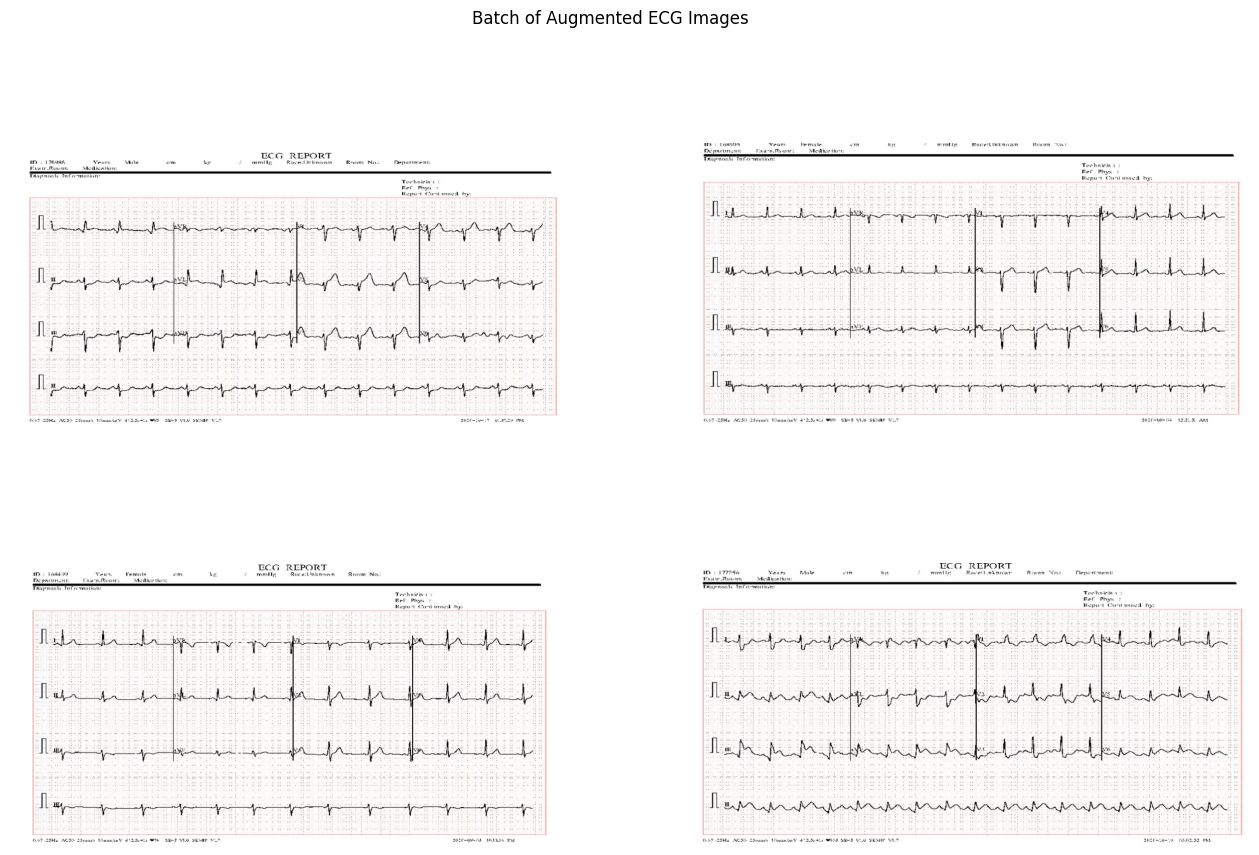

In [9]:
# Paths
train_dir = "Data/train"
test_dir = "Data/test"
classes = ["Abnormal_Heartbeat", "Myocardial_Infarction", "History_Myocardial_Infarction", "Normal"]

# Resize images for CNN input
IMG_HEIGHT, IMG_WIDTH = 512, 1024


def preprocess_image(img_path):
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    return img_array

# Data generators with minimal augmentation, only zoom 1-5% 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

# Visualize a batch
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(16,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Batch of Augmented ECG Images")
plt.show()

# Models

In [15]:
# CNN Model
def Baseline_CNN(input_shape=(512,1024,3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


def Small_1CNN(input_shape=(512, 1024, 3), num_classes=4):

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((4,4)),  # reduces feature map size drastically
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

def Small_2CNN(input_shape=(512, 1024, 3), num_classes=4):

    model = Sequential([
        Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((4,4)),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D((4,4)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [16]:

# model = Small_1CNN()
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

# Train

In [17]:
# history = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=5,
#     steps_per_epoch=len(train_generator),
#     validation_steps=len(validation_generator)
# )

# Plot Results

In [18]:
# # Plot training history
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='train_acc')
# plt.plot(history.history['val_accuracy'], label='val_acc')
# plt.title('Accuracy')
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='train_loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.title('Loss')
# plt.legend()
# plt.show()

# # Evaluate on validation set
# val_images, val_labels = next(validation_generator)
# predictions = model.predict(val_images)
# pred_labels = np.argmax(predictions, axis=1)
# true_labels = np.argmax(val_labels, axis=1)

# # Confusion matrix
# cm = confusion_matrix(true_labels, pred_labels)
# plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Baseline CNN Confusion Matrix")
# plt.show()

# # Classification report
# print(classification_report(true_labels, pred_labels, target_names=classes))

# Loop over all 3 models


Baseline_CNN Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 510, 1022, 32)  │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 255, 511, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 253, 509, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 126, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 124, 252, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 62, 126, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 999936)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │   127,991,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,085,700 (488.61 MB)

 Trainable params: 128,085,700 (488.61 MB)

 Non-trainable params: 0 (0.00 B)


Small_1CNN Summary:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 512, 1024, 32)  │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 128, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │    67,108,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,110,084 (256.00 MB)

 Trainable params: 67,110,084 (256.00 MB)

 Non-trainable params: 0 (0.00 B)


Small_2CNN Summary:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 512, 1024, 16)  │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 128, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 256, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,199,716 (16.02 MB)

 Trainable params: 4,199,716 (16.02 MB)

 Non-trainable params: 0 (0.00 B)


Training Baseline_CNN ...
Epoch 1/10


2025-10-22 18:15:46.555249: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,253,509]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,255,511]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 18:15:46.766682: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,128,124,252]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,126,254]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActi

 16/322 ━━━━━━━━━━━━━━━━━━━━ 4:14 831ms/step - accuracy: 0.2469 - loss: 24.3895

2025-10-22 18:16:06.178735: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,64,253,509]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,32,255,511]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 18:16:06.308868: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,128,124,252]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,64,126,254]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActi

322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.2961 - loss: 4.2966

2025-10-22 18:20:47.252057: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,64,253,509]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,255,511]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 18:20:47.468471: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,128,124,252]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,126,254]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActi

322/322 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.3126 - loss: 1.9665 - val_accuracy: 0.3171 - val_loss: 1.3656
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.3165 - loss: 1.3637 - val_accuracy: 0.3171 - val_loss: 1.3616
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.3169 - loss: 1.3629 - val_accuracy: 0.3171 - val_loss: 1.3613
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.3110 - loss: 1.3627 - val_accuracy: 0.3171 - val_loss: 1.3613
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.3165 - loss: 1.3632 - val_accuracy: 0.3171 - val_loss: 1.3613
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.3161 - loss: 1.3628 - val_accuracy: 0.3171 - val_loss: 1.3612
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.3165 - loss: 1.3619 - val_accuracy: 0.3171 - val_loss: 1.3613
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 316s 981ms/step - accuracy: 0.3161 - loss: 1.3619 - val_accuracy: 0.

2025-10-22 19:16:18.184146: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,32,512,1024]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,3,512,1024]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


322/322 ━━━━━━━━━━━━━━━━━━━━ 324s 992ms/step - accuracy: 0.3072 - loss: 5.5031 - val_accuracy: 0.3171 - val_loss: 1.3726
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 317s 984ms/step - accuracy: 0.3149 - loss: 1.3834 - val_accuracy: 0.3171 - val_loss: 1.3658
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.3149 - loss: 1.4236 - val_accuracy: 0.3215 - val_loss: 1.3619
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.3184 - loss: 1.3615 - val_accuracy: 0.3149 - val_loss: 1.3542
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.3157 - loss: 1.3574 - val_accuracy: 0.3126 - val_loss: 1.3564
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.3180 - loss: 1.3523 - val_accuracy: 0.3282 - val_loss: 1.3191
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 319s 992ms/step - accuracy: 0.3029 - loss: 1.3190 - val_accuracy: 0.3149 - val_loss: 1.3033
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 319s 992ms/step - accuracy: 0.3503 - loss: 1.2465 - val_acc

2025-10-22 20:05:35.565435: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,128,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,16,128,256]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


231/322 ━━━━━━━━━━━━━━━━━━━━ 1:19 874ms/step - accuracy: 0.3010 - loss: 2.2471

2025-10-22 20:08:59.487991: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[4,32,128,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,16,128,256]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.3013 - loss: 2.0463

2025-10-22 20:10:23.350943: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,128,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,16,128,256]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-10-22 20:11:11.112399: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[3,16,512,1024]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,3,512,1024]{3,2,1,0}, f32[16,3,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target=

322/322 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.3126 - loss: 1.4983 - val_accuracy: 0.5499 - val_loss: 1.1637
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.5455 - loss: 1.0351 - val_accuracy: 0.7251 - val_loss: 0.6905
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.6715 - loss: 0.7791 - val_accuracy: 0.8293 - val_loss: 0.5345
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 358s 1s/step - accuracy: 0.7554 - loss: 0.5958 - val_accuracy: 0.9157 - val_loss: 0.3276
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.8103 - loss: 0.4646 - val_accuracy: 0.9224 - val_loss: 0.2397
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 323s 1s/step - accuracy: 0.8289 - loss: 0.4027 - val_accuracy: 0.9379 - val_loss: 0.1869
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.8655 - loss: 0.3316 - val_accuracy: 0.9468 - val_loss: 0.1489
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 315s 979ms/step - accuracy: 0.8701 - loss: 0.2898 - val_accuracy: 0.

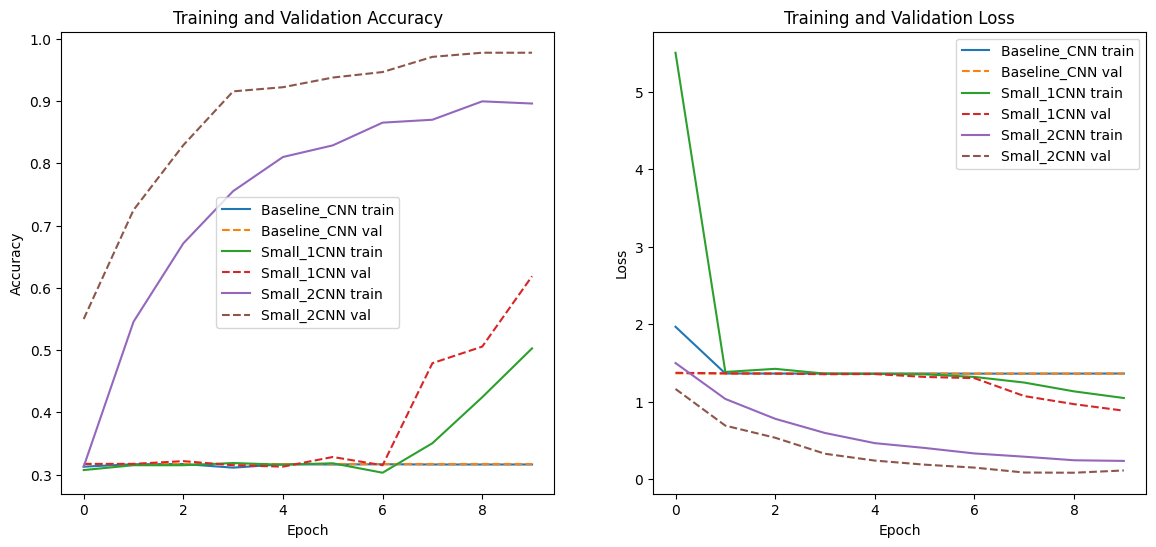


Baseline_CNN Confusion Matrix:


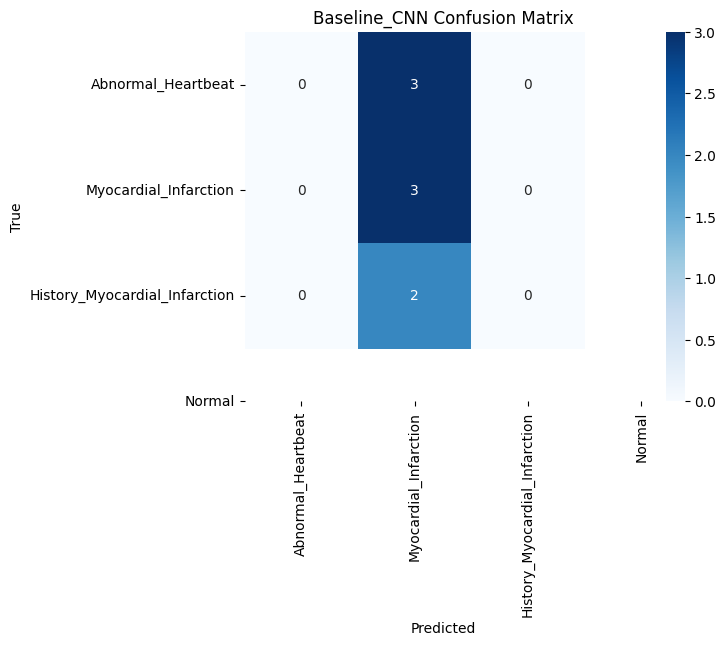


Baseline_CNN Classification Report:


,precision,recall,f1-score,support
Abnormal_Heartbeat,0.000000,0.000,0.000000,3.000
Myocardial_Infarction,0.000000,0.000,0.000000,0.000
History_Myocardial_Infarction,0.375000,1.000,0.545455,3.000
Normal,0.000000,0.000,0.000000,2.000
accuracy,0.375000,0.375,0.375000,0.375
macro avg,0.093750,0.250,0.136364,8.000
weighted avg,0.140625,0.375,0.204545,8.000



Small_1CNN Confusion Matrix:


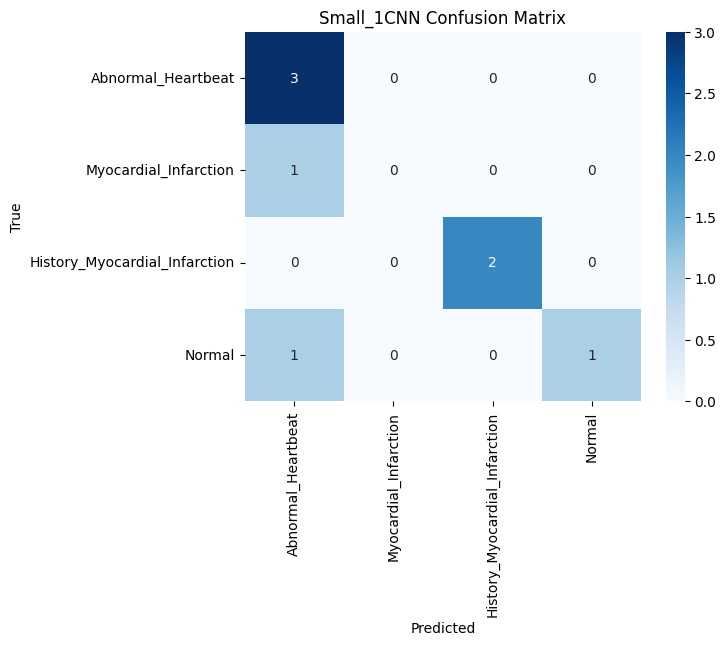


Small_1CNN Classification Report:


,precision,recall,f1-score,support
Abnormal_Heartbeat,0.600,1.000,0.750000,3.00
Myocardial_Infarction,0.000,0.000,0.000000,1.00
History_Myocardial_Infarction,1.000,1.000,1.000000,2.00
Normal,1.000,0.500,0.666667,2.00
accuracy,0.750,0.750,0.750000,0.75
macro avg,0.650,0.625,0.604167,8.00
weighted avg,0.725,0.750,0.697917,8.00



Small_2CNN Confusion Matrix:


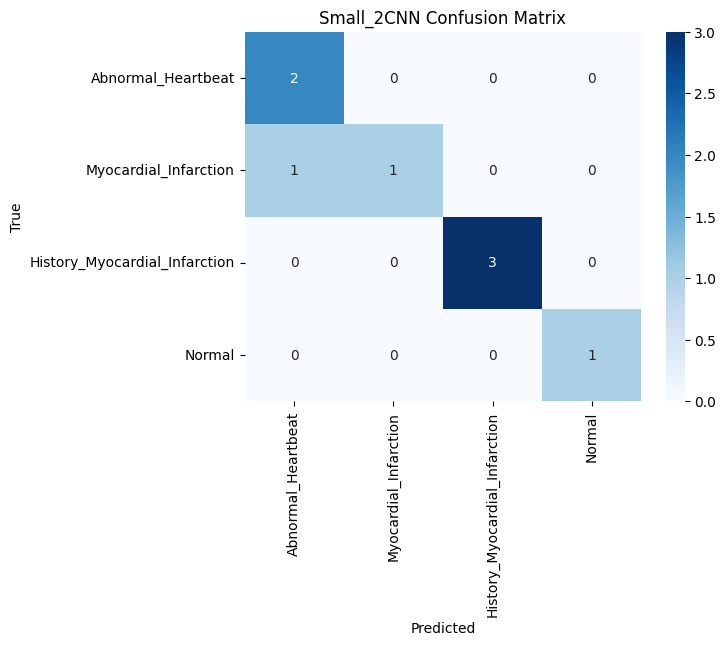


Small_2CNN Classification Report:


,precision,recall,f1-score,support
Abnormal_Heartbeat,0.666667,1.000,0.800000,2.000
Myocardial_Infarction,1.000000,0.500,0.666667,2.000
History_Myocardial_Infarction,1.000000,1.000,1.000000,3.000
Normal,1.000000,1.000,1.000000,1.000
accuracy,0.875000,0.875,0.875000,0.875
macro avg,0.916667,0.875,0.866667,8.000
weighted avg,0.916667,0.875,0.866667,8.000


In [19]:
# List of CNN models to train
cnn_models = {
    "Baseline_CNN": Baseline_CNN(),
    "Small_1CNN": Small_1CNN(),
    "Small_2CNN": Small_2CNN()
}

# Compile models
for name, model in cnn_models.items():
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"\n{name} Summary:")
    model.summary()

# Dictionaries to store training histories and evaluation results
histories = {}
eval_results = {}

# Training loop
for name, model in cnn_models.items():
    print(f"\nTraining {name} ...")
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=10,
        steps_per_epoch=len(train_generator),
        validation_steps=len(validation_generator)
    )
    histories[name] = history

    # Evaluate on a batch of validation images
    val_images, val_labels = next(validation_generator)
    predictions = model.predict(val_images)
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(val_labels, axis=1)
    
    eval_results[name] = {
        "confusion_matrix": confusion_matrix(true_labels, pred_labels),
        # Fixed line
        "classification_report": classification_report(true_labels, pred_labels, labels=range(len(classes)), target_names=classes, output_dict=True, zero_division=0)}

# Plot accuracy and loss for all models
plt.figure(figsize=(14,6))

# Accuracy
plt.subplot(1,2,1)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} train')
    plt.plot(history.history['val_accuracy'], '--', label=f'{name} val')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{name} train')
    plt.plot(history.history['val_loss'], '--', label=f'{name} val')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Print confusion matrices and classification reports
for name, results in eval_results.items():
    print(f"\n{name} Confusion Matrix:")
    sns.heatmap(results["confusion_matrix"], annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    print(f"\n{name} Classification Report:")
    df_report = pd.DataFrame(results["classification_report"]).transpose()
    display(df_report)
